In [ ]:
import pandas as pd
import seaborn as sns
def output(filename):  ######## This function takes filename as argument and returns the contents of the file as dataframe
    df = pd.read_csv(filename)
    return df
df = output(r"API_19_DS2_en_csv_v2_3931355.csv") 

In [ ]:
df.info() #### Dataframe information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216 entries, 0 to 20215
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    20216 non-null  object 
 1   Country Code    20216 non-null  object 
 2   Indicator Name  20216 non-null  object 
 3   Indicator Code  20216 non-null  object 
 4   1960            3140 non-null   float64
 5   1961            4546 non-null   float64
 6   1962            4727 non-null   float64
 7   1963            4587 non-null   float64
 8   1964            4643 non-null   float64
 9   1965            4679 non-null   float64
 10  1966            4690 non-null   float64
 11  1967            4859 non-null   float64
 12  1968            4711 non-null   float64
 13  1969            4718 non-null   float64
 14  1970            5987 non-null   float64
 15  1971            7338 non-null   float64
 16  1972            7545 non-null   float64
 17  1973            7358 non-null  

In [ ]:
df['Indicator Name'].value_counts()

Urban population (% of total population)                                                      266
CO2 intensity (kg per kg of oil equivalent energy use)                                        266
Renewable electricity output (% of total electricity output)                                  266
Electricity production from renewable sources, excluding hydroelectric (kWh)                  266
Electricity production from renewable sources, excluding hydroelectric (% of total)           266
                                                                                             ... 
GHG net emissions/removals by LUCF (Mt of CO2 equivalent)                                     266
Droughts, floods, extreme temperatures (% of population, average 1990-2009)                   266
Rural population living in areas where elevation is below 5 meters (% of total population)    266
Urban population living in areas where elevation is below 5 meters (% of total population)    266
Agricultural land (s

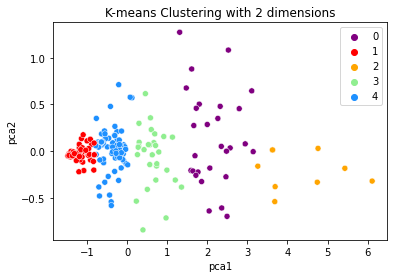

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

df_land = df.loc[df['Indicator Name'] == 'Arable land (% of land area)']

df_land = df_land.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code' ,'1960','2019','2020'])


df_land = df_land.dropna()

df_land = df_land.reset_index(drop=True)
df_land = df_land.set_index('Country Name')


def f(s):
    return s/s.max()

df_new = df_land.apply(f, axis=0)
clustering_kmeans = KMeans(n_clusters=5)
kmeans = clustering_kmeans.fit_predict(df_new)
#Coordinates of cluster centers with shape [n_clusters, n_features]
clustering_kmeans.fit(df_new).cluster_centers_
#Labels of each point
clustering_kmeans.fit(df_new).labels_

z=df_new[clustering_kmeans.labels_==3] #### selecting countries from cluster number 3

### Run PCA on the data and reduce the dimensions in pca_num_components dimensions

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(df_new)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=kmeans, data=results,
              palette=['purple','red','orange','lightgreen','dodgerblue'],
              legend='full',)
plt.title('K-means Clustering with 2 dimensions')
plt.savefig('kmeans.jpg')
plt.show()

In [ ]:
z.reset_index(drop=True)
z=z.drop(columns=['index'])
print(z)
print(z.info())
z.loc[z['Country Name'] == 'Italy']

            Country Name      1961      1962      1963      1964      1965  \
0                Burundi  0.396757  0.412731  0.426485  0.436491  0.436608   
1                Belgium  0.463134  0.463190  0.461377  0.458130  0.450076   
2               Bulgaria  0.580145  0.568535  0.565819  0.569247  0.558619   
3               Barbados  0.561652  0.563398  0.562874  0.560594  0.551844   
4                Comoros  0.527209  0.528848  0.528356  0.526216  0.518002   
5                   Cuba  0.203789  0.212176  0.224233  0.247172  0.223705   
6                Germany  0.528324  0.528448  0.527090  0.524782  0.516251   
7              Euro area  0.460420  0.461159  0.459773  0.452725  0.443449   
8                  Spain  0.490663  0.493703  0.490490  0.479882  0.473786   
9         European Union  0.482441  0.482457  0.479707  0.474052  0.463531   
10                France  0.540466  0.540045  0.537471  0.524920  0.509089   
11        United Kingdom  0.447660  0.452869  0.454887  0.457964

,Country Name,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
15,Italy,0.660108,0.65871,0.651874,0.645341,0.631536,0.626004,0.620066,0.618893,0.613949,...,0.39628,0.4,0.387327,0.40032,0.385613,0.376208,0.377799,0.381716,0.384294,0.377606


              Country Name  Year     Value
0                  Burundi  1961  0.396757
1                  Belgium  1961  0.463134
2                 Bulgaria  1961  0.580145
3                 Barbados  1961  0.561652
4                  Comoros  1961  0.527209
...                    ...   ...       ...
1619  Syrian Arab Republic  2018  0.424549
1620                  Togo  2018  0.814752
1621              Thailand  2018  0.550223
1622                Turkey  2018  0.428538
1623                Uganda  2018  0.575427

[1624 rows x 3 columns]


C:\Users\prita\AppData\Local\Temp/ipykernel_18536/504938799.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  germany_df['Year'] = pd.to_numeric(germany_df["Year"])


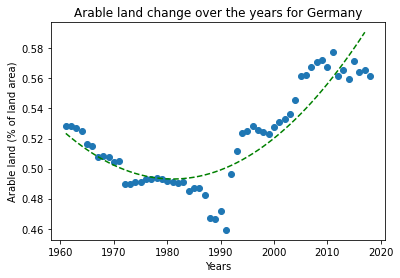

In [ ]:
import seaborn as sns
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit

z_melted = z.melt(id_vars=["Country Name"], var_name="Year", value_name="Value")
print(z_melted)
germany_df = z_melted[z_melted["Country Name"]=="Germany"]
germany_df['Year'] = pd.to_numeric(germany_df["Year"])


# objective function
def objective(x, a, b, c):
    return a * x + b * x**2 + c

x = germany_df["Year"]
y = germany_df["Value"] 

# curve fit
popt, _ = curve_fit(objective, x, y)
# summarizing the parameter values
a, b,c = popt
# plot input vs output
plt.scatter(x, y)
# sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# the output for the range
y_line = objective(x_line, a, b,c)
# line plot for the mapping function
plt.plot(x_line, y_line, '--', color='green')
plt.title("Arable land change over the years for Germany")
plt.xlabel("Years")
plt.ylabel("Arable land (% of land area)")
plt.savefig('samoa.jpg')
plt.show()

C:\Users\prita\AppData\Local\Temp/ipykernel_18536/81515970.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spain_df['Year'] = pd.to_numeric(spain_df["Year"])


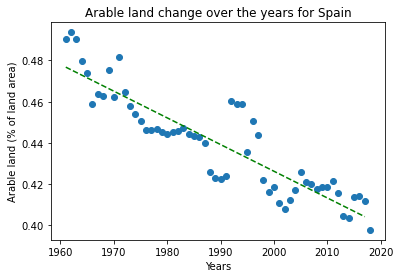

In [ ]:
import numpy as np
from numpy import sin
from numpy import sqrt

spain_df = z_melted[z_melted["Country Name"]=="Spain"]
spain_df['Year'] = pd.to_numeric(spain_df["Year"])
# define the true objective function
def objective(x, a, b):
    return a * x + b


x = spain_df["Year"]
y = spain_df["Value"] 

# curve fit
popt, _ = curve_fit(objective, x, y)
# summarizing the parameter values
a,b = popt
# plot input vs output
plt.scatter(x, y)
# sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# the output for the range
y_line = objective(x_line, a,b)
# a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='green')
plt.title("Arable land change over the years for Spain")
plt.xlabel("Years")
plt.ylabel("Arable land (% of land area)")
plt.savefig('spain.jpg')
plt.show()

C:\Users\prita\AppData\Local\Temp/ipykernel_18536/1450099906.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_df['Year'] = pd.to_numeric(italy_df["Year"])


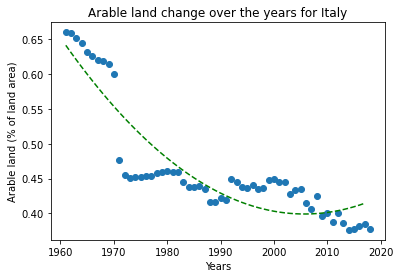

In [ ]:
import numpy as np
from numpy import sin
from numpy import sqrt

italy_df = z_melted[z_melted["Country Name"]=="Italy"]
italy_df['Year'] = pd.to_numeric(italy_df["Year"])
# objective function
def objective(x, a, b, c):
    return a * x + b * x**2 + c

x = italy_df["Year"]
y = italy_df["Value"] 

# curve fit
popg, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b,c = popg
# plot input vs output
plt.scatter(x, y)
# sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# the output for the range
y_line = objective(x_line, a, b,c)
# a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='green')
plt.title("Arable land change over the years for Italy")
plt.xlabel("Years")
plt.ylabel("Arable land (% of land area)")
plt.savefig('italy.jpg')
plt.show()